<a href="https://colab.research.google.com/github/harrizazham98/DataScienceProj/blob/main/002_college_acceptance_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is taken from https://www.kaggle.com/tejashvi14/engineering-placements-prediction 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/CDLE2.0/data/collegePlace.csv") 

In [ ]:
dataset.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [ ]:
dataset.shape

(2966, 8)

In [ ]:
dataset[dataset["PlacedOrNot"]==0]

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
7,21,Male,Information Technology,1,7,0,0,0
9,21,Female,Computer Science,1,6,1,0,0
10,22,Male,Computer Science,1,7,0,0,0
...,...,...,...,...,...,...,...,...
2960,23,Male,Mechanical,1,7,1,0,0
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0


In [ ]:
dataset[dataset["PlacedOrNot"]==1]

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2951,21,Male,Computer Science,3,8,0,0,1
2952,23,Male,Mechanical,0,8,1,0,1
2954,23,Female,Computer Science,1,8,0,1,1
2956,22,Male,Computer Science,0,8,0,0,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


## From dataset.info( ), it shows that the dataset does not contain any missing values

In [ ]:
dataset.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [ ]:
dataset.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

In [ ]:
numeric_data = [num_col for num_col in dataset.columns if dataset[num_col].dtypes == 'int64']

In [ ]:
numeric_data

['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']

In [ ]:
category_data = [cat_col for cat_col in dataset.columns if cat_col not in numeric_data ]

In [ ]:
category_data

['Gender', 'Stream']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


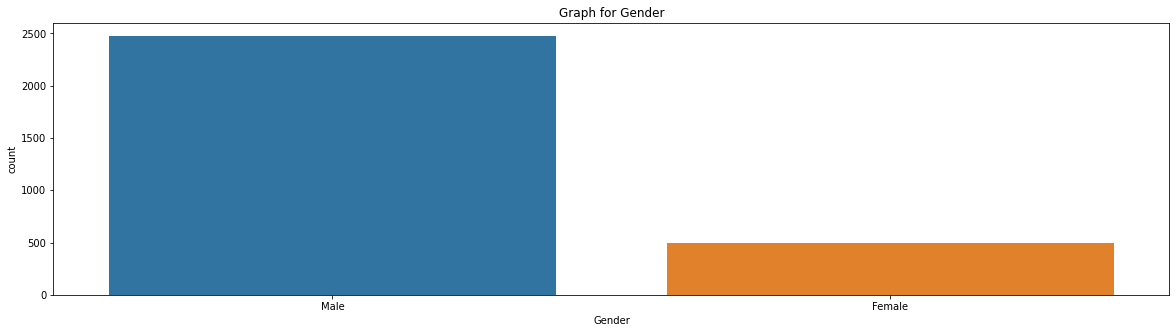

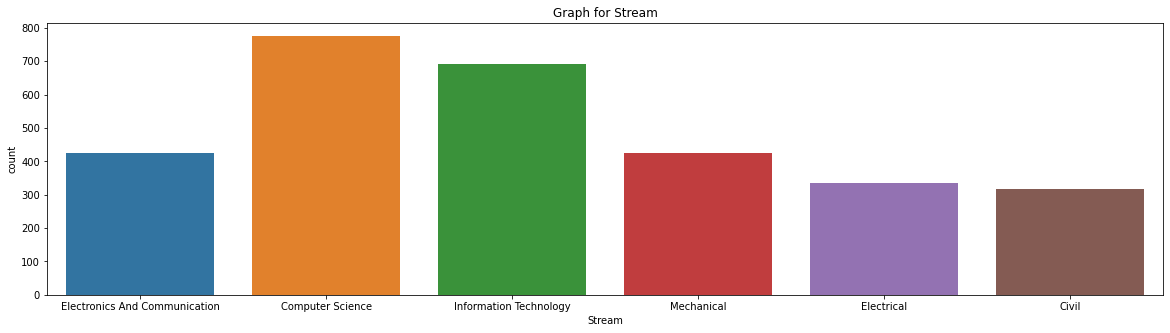

In [ ]:

for col in category_data:
  fig = plt.figure(figsize=(20,5))
  graph = sns.countplot(dataset[col])
  graph.set(title = "Graph for " + str(col))

Based on categorical features, most of the applicants are male and choose Computer Science stream.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

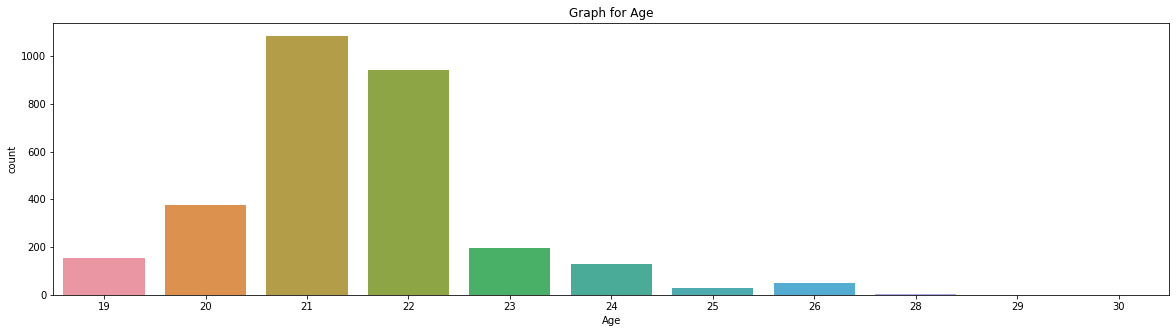

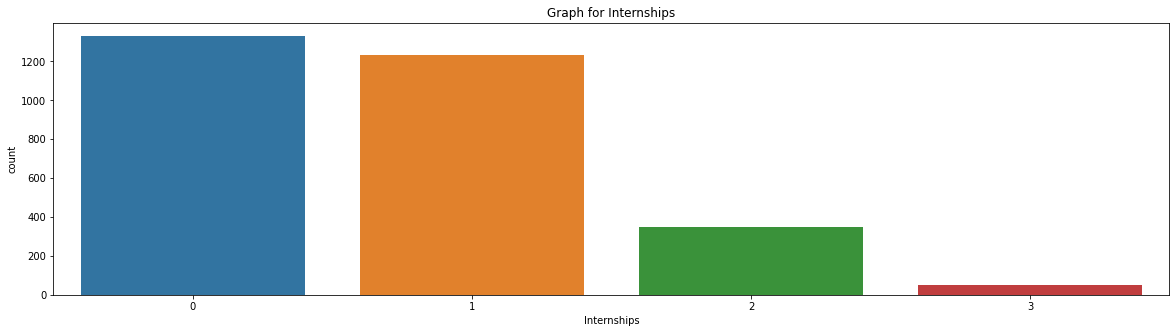

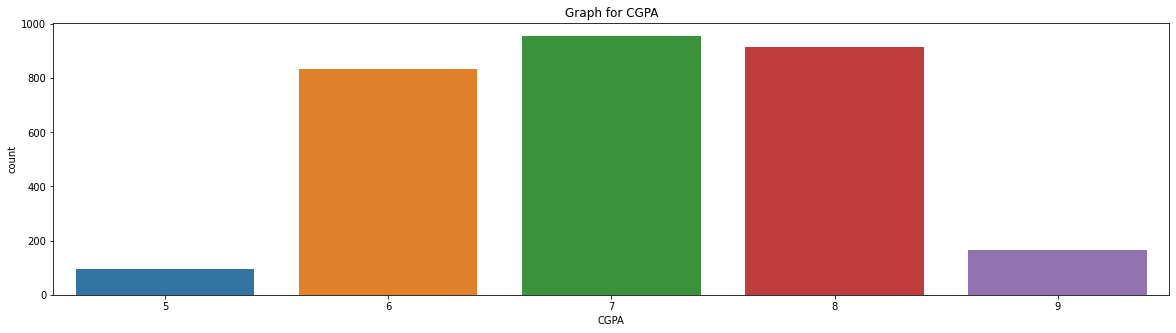

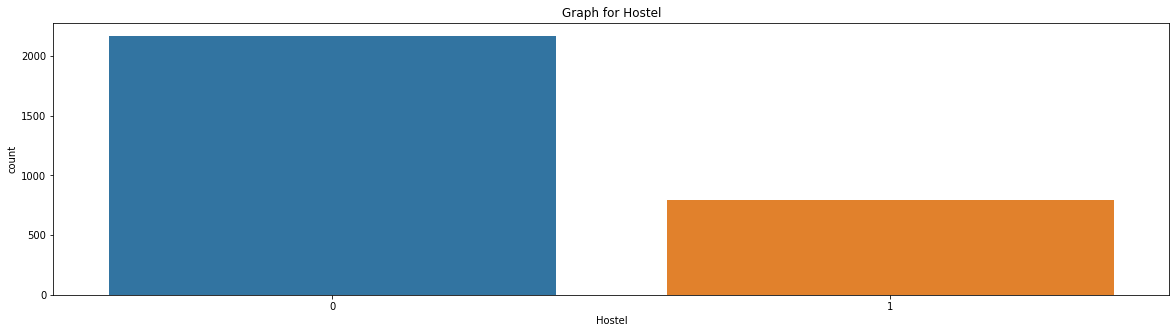

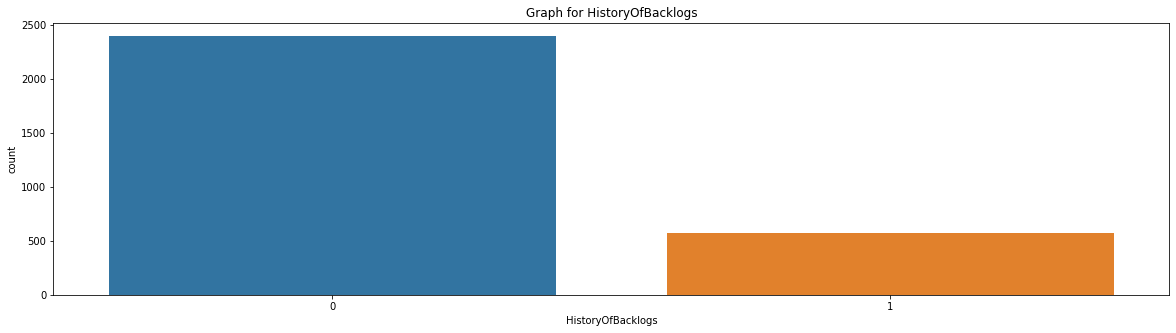

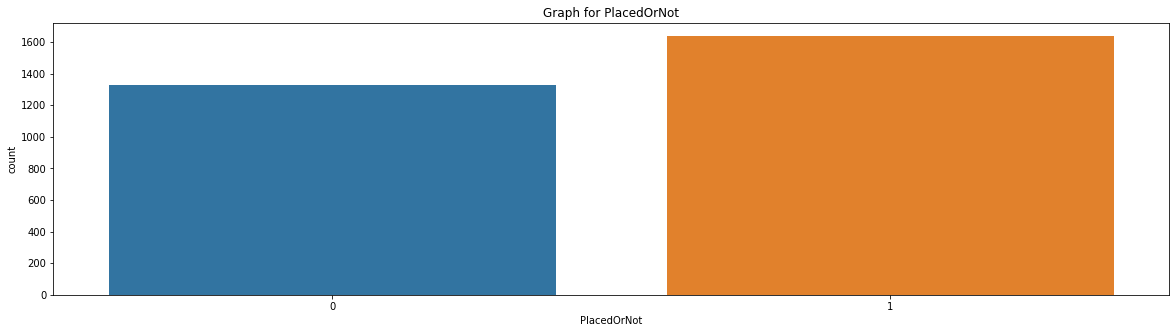

In [ ]:
for col in numeric_data:
  fig =plt.figure(figsize=(20,5))
  graph1 = sns.countplot(dataset[col])
  graph1.set(title = "Graph for " + str(col))

From numerical features, most of applicannts are between 21 to 22. Then, most of them do not have much internship experience as most of them didn't have the chance to do it or probably had only chance to do it. Most of applicants are good in academic record as most of them are above 6. Next, most applicants didn't have hostel and backlog history. 

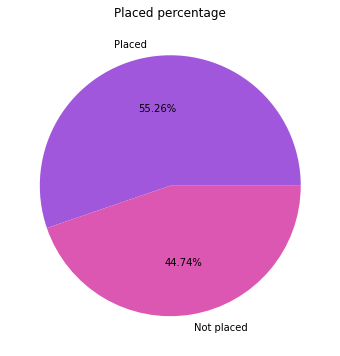

In [ ]:
plt.figure(figsize=(6, 6))
classx = ['Placed','Not placed']
plt.title('Placed percentage')
colors = sns.color_palette("hls", 8)[6:8]
countx = [len(dataset[dataset.PlacedOrNot == 1]),len(dataset[dataset.PlacedOrNot == 0])]
plt.pie(countx, labels = classx,colors=colors,autopct='%1.2f%%')
plt.show()

Overall, the number of applicants get the placement is higher than to those who dont get the placement.

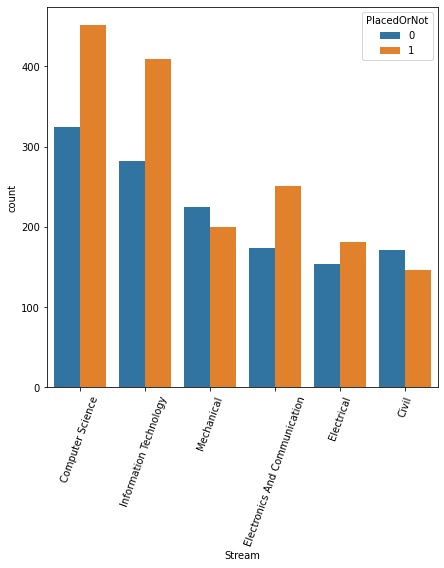

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot(data=dataset,x='Stream', order = dataset['Stream'].value_counts().index,hue='PlacedOrNot')
plt.xticks(rotation=70)
plt.show()

Most of applicants from Computer Science stream obtain their placement. From the graph, there is an imbalance pattern on how every stream receives the placement from students. Maybe, it depends on every departments as they have different placements of new intake every year.

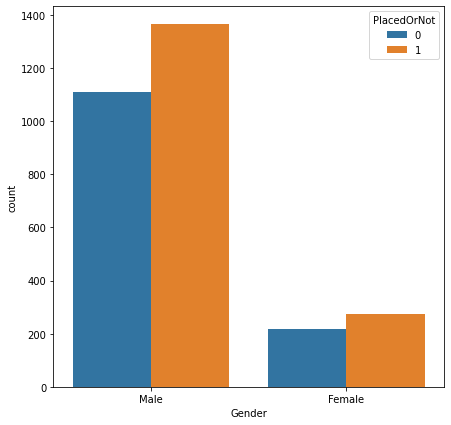

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot(data=dataset, x = "Gender", hue = "PlacedOrNot")
plt.show()

From the graph, it shows that most of applicants are male and it is very competitive among them but not for female. Overall, most applicant who get accepted are male.

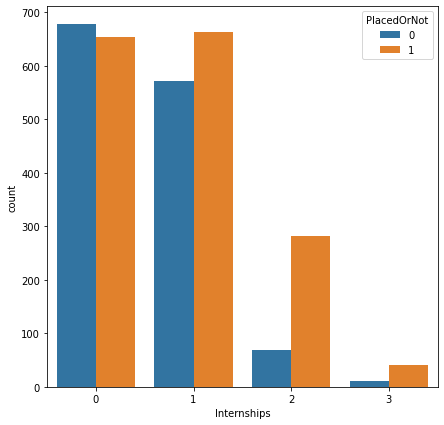

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot(data=dataset, x="Internships", hue="PlacedOrNot")
plt.show()


If the applicants don't have any internship experience, they still have equal chances with other who have some internship experiences. Also, this can be seen that there are still applicants who have lots of internship experiences but they still do not get the placement

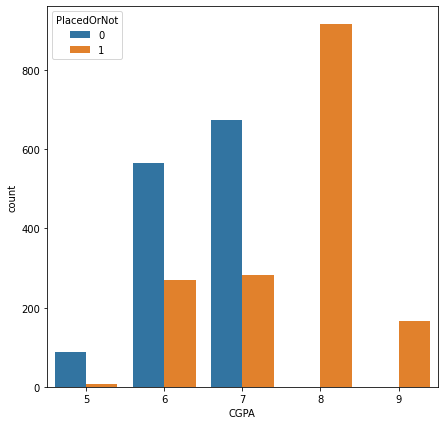

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
graph = sns.countplot(data=dataset, x= "CGPA", hue ="PlacedOrNot" )
plt.show()

From the graph, those applicants who obtained a CGPA higher than 7 get their placement. Between CGPA 6 and 7, there are higher number of applicants who do not get the placement due to high competition.


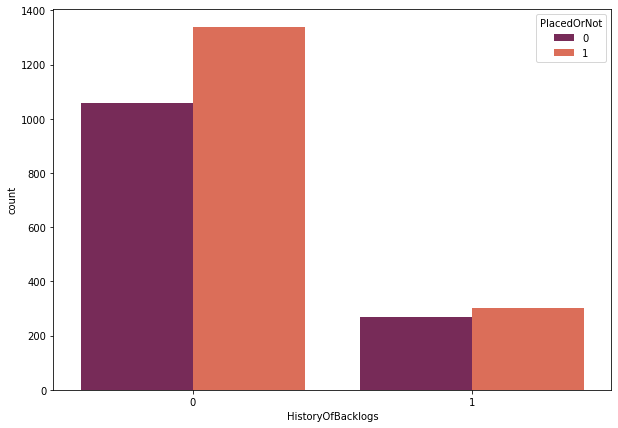

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=dataset,x='HistoryOfBacklogs',palette='rocket',hue='PlacedOrNot')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder 
# the difference between fit, transform and fit_transform ; https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models 

In [ ]:
encoder = LabelEncoder()
for col in category_data:
  dataset[col] = encoder.fit_transform(dataset[col])

In [ ]:
dataset.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [ ]:
dataset.Age.max()

30

In [ ]:
dataset.Age.unique()

array([22, 21, 23, 24, 28, 30, 25, 26, 20, 19, 29])

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
dataset.shape

(2966, 8)

In [ ]:
df_train = dataset[0:2521]
df_test = dataset[2521:] ####

In [ ]:
X = df_train.drop(["PlacedOrNot"], axis=1)
Y = df_train.PlacedOrNot
print(X.shape)
print(Y.shape)

(2521, 7)
(2521,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2016, 7)
(505, 7)
(2016,)
(505,)


In [ ]:
model1=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [ ]:
model1.fit(X_train,Y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
model1.get_support()

array([ True, False,  True,  True,  True,  True, False])

In [ ]:
selected_features = X_train.columns[(model1.get_support())]

In [ ]:
selected_features

Index(['Age', 'Stream', 'Internships', 'CGPA', 'Hostel'], dtype='object')

In [ ]:
not_selected = [col2 for col2 in X_train.columns if col2 not in selected_features]
print(not_selected)

['Gender', 'HistoryOfBacklogs']


From Lasso (feature selection), Gender and HistoryOfBacklogs can be removed as they didnt contribute in predictive anaysis


In [ ]:
X_train_final = X_train.drop(not_selected, axis=1)
X_test_final = X_test.drop(not_selected, axis=1)

In [ ]:
print(X_train_final.shape)
print(X_test_final.shape)

(2016, 5)
(505, 5)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
class MLModels():

  def __init__(self, model_n, model,x_test,y_test):
    self.model_n = model_n
    self.model=model
    self.x_test=x_test
    self.y_test=y_test

  def fit(self, X_train_final, y=Y_train):
    return self 

  def transform(self,X_train_final, y=Y_train ):
    zipped_model = zip(self.model_n, self.model)
    acc_score =[]

    for n,m in zipped_model:
      model_fit = m.fit(X_train_final,Y_train )
      y_pred = model_fit.predict(self.x_test)
      acc = accuracy_score(self.y_test, y_pred)
      acc_score.append(acc)

    report = pd.DataFrame({
        'Model':self.model_n,
        'Score':acc_score,
        'Model_func': self.model})
    model_rank = report.sort_values(by='Score', ascending =False)
    print(model_rank.iloc[:,:2])

    return model_rank.iloc[0]



In [ ]:
model_names = ["SVM","KNN","Logistic Regression", "Random Forest", "Decision Tree"]

models = [SVC(kernel='linear', probability=True), KNeighborsClassifier(n_neighbors=4), LogisticRegression(solver="liblinear"), RandomForestClassifier(n_estimators=100), DecisionTreeClassifier()]

In [ ]:
MLpipe = Pipeline(steps=[
                         ('MLModels', MLModels(model_names, models, X_test_final, Y_test))
])


In [ ]:
best_model = MLpipe.fit_transform(X_train_final, Y_train).Model_func
best_model

                 Model     Score
3        Random Forest  0.843564
4        Decision Tree  0.843564
1                  KNN  0.837624
0                  SVM  0.744554
2  Logistic Regression  0.732673


RandomForestClassifier()

STICK WITH 7 FEATURES


In [ ]:
class ML7Models():

  def __init__(self, model_n, model,x_test,y_test):
    self.model_n = model_n
    self.model=model
    self.x_test=x_test
    self.y_test=y_test

  def fit(self, X_train, y=Y_train):
    return self 

  def transform(self,X_train, y=Y_train ):
    zipped_model = zip(self.model_n, self.model)
    acc_score =[]

    for n,m in zipped_model:
      model_fit = m.fit(X_train,Y_train )
      y_pred = model_fit.predict(self.x_test)
      acc = accuracy_score(self.y_test, y_pred)
      acc_score.append(acc)

    report = pd.DataFrame({
        'Model':self.model_n,
        'Score':acc_score,
        'Model_func': self.model})
    model_rank = report.sort_values(by='Score', ascending =False)
    print(model_rank.iloc[:,:2])

    return model_rank.iloc[0]

In [ ]:
model7_names = ["SVM","KNN","Logistic Regression", "Random Forest", "Decision Tree"]

models7 = [SVC(kernel='linear', probability=True), KNeighborsClassifier(n_neighbors=4), LogisticRegression(solver="liblinear"), RandomForestClassifier(n_estimators=100), DecisionTreeClassifier()]

In [ ]:
ML7pipe = Pipeline(steps=[
                         ('ML7Models', ML7Models(model_names, models, X_test, Y_test))
])

In [ ]:
best7_model = ML7pipe.fit_transform(X_train, Y_train).Model_func
best7_model

                 Model     Score
3        Random Forest  0.845545
4        Decision Tree  0.843564
1                  KNN  0.839604
0                  SVM  0.748515
2  Logistic Regression  0.732673


RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score


def k_fold(model, x, y, n_fold=10):
    scores = cross_val_score(model, x, y, cv=n_fold, scoring="accuracy")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())


In [ ]:
k_fold(best_model, X_train_final, Y_train)

Scores: [0.83663366 0.81683168 0.85643564 0.87128713 0.86633663 0.87128713
 0.87064677 0.85572139 0.8358209  0.86069652]
Mean: 0.8541697453327421
Standard Deviation: 0.017589772654364247


Text(0.5, 1.0, 'Correlation Heatmap')

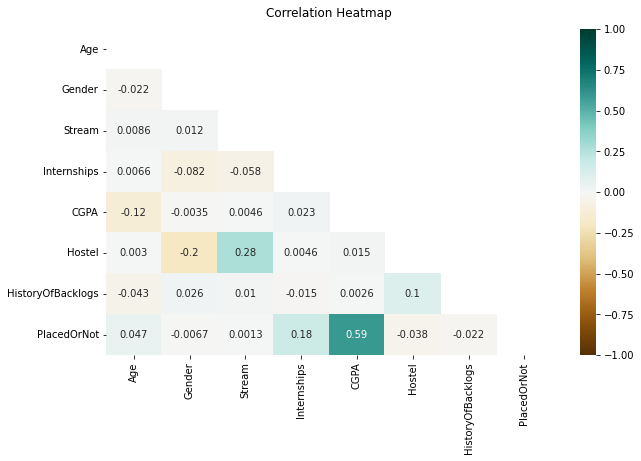

In [ ]:
# Correlation between each feature
df_corr = dataset.corr()
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))
sns.heatmap(df_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

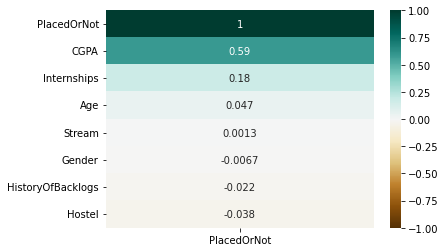

In [ ]:
# Correlation between feature and the label itself
heatmap = sns.heatmap(dataset.corr()[['PlacedOrNot']].sort_values(
    by='PlacedOrNot', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
dataset.PlacedOrNot.unique()

array([1, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_final)
scaled_X_test = scaler.fit_transform(X_test_final)


In [ ]:
class MLSModels():

  def __init__(self, model_n, model,x_test,y_test):
    self.model_n = model_n
    self.model=model
    self.x_test=x_test
    self.y_test=y_test

  def fit(self, scaled_X_train, y=Y_train):
    return self 

  def transform(self,scaled_X_train, y=Y_train ):
    zipped_model = zip(self.model_n, self.model)
    acc_score =[]

    for n,m in zipped_model:
      model_fit = m.fit(scaled_X_train,Y_train )
      y_pred = model_fit.predict(self.x_test)
      acc = accuracy_score(self.y_test, y_pred)
      acc_score.append(acc)

    report = pd.DataFrame({
        'Model':self.model_n,
        'Score':acc_score,
        'Model_func': self.model})
    model_rank = report.sort_values(by='Score', ascending =False)
    print(model_rank.iloc[:,:2])

    return model_rank.iloc[0]

In [ ]:
model7_names = ["SVM","KNN","Logistic Regression", "Random Forest", "Decision Tree"]

models = [SVC(kernel='linear', probability=True), KNeighborsClassifier(n_neighbors=4), LogisticRegression(solver="liblinear"), RandomForestClassifier(n_estimators=100), DecisionTreeClassifier()]

In [ ]:
MLSpipe = Pipeline(steps=[
                         ('MLSModels', MLSModels(model_names, models, scaled_X_test, Y_test))
])

In [ ]:
best7_model = MLSpipe.fit_transform(scaled_X_train, Y_train).Model_func
best7_model

                 Model     Score
4        Decision Tree  0.843564
1                  KNN  0.841584
3        Random Forest  0.831683
0                  SVM  0.742574
2  Logistic Regression  0.740594


DecisionTreeClassifier()

In [ ]:
import tensorflow as tf 

In [ ]:
inputs = tf.placeholder(tf.float32, shape=(None, X_train_final.shape[1]), name='inputs')
label = tf.placeholder(tf.float32, shape=(None, 2), name='labels')

# First layer
hid1_size = 128
w1 = tf.Variable(tf.random_normal([hid1_size, X_train_final.shape[1]], stddev=0.01), name='w1')
b1 = tf.Variable(tf.constant(0.1, shape=(hid1_size, 1)), name='b1')
y1 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w1, tf.transpose(inputs)), b1)), keep_prob=0.5)

# Second layer
hid2_size = 256
w2 = tf.Variable(tf.random_normal([hid2_size, hid1_size], stddev=0.01), name='w2')
b2 = tf.Variable(tf.constant(0.1, shape=(hid2_size, 1)), name='b2')
y2 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w2, y1), b2)), keep_prob=0.5)

# Output layer
wo = tf.Variable(tf.random_normal([2, hid2_size], stddev=0.01), name='wo')
bo = tf.Variable(tf.random_normal([2, 1]), name='bo')
yo = tf.transpose(tf.add(tf.matmul(wo, y2), bo))

AttributeError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

In [ ]:
features1 = X.copy()
features = np.array(features1)
features

array([[22,  1,  3, ...,  8,  1,  1],
       [21,  0,  1, ...,  7,  1,  1],
       [22,  0,  4, ...,  6,  0,  0],
       ...,
       [20,  1,  1, ...,  8,  0,  0],
       [21,  1,  0, ...,  8,  0,  1],
       [20,  1,  1, ...,  6,  0,  0]])

In [ ]:
neural_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.losses.BinaryCrossentropy,
                      optimizer = tf.optimizers.Adam())